In [1]:
"""
    Importar las librerias correspondientes para su funcionamiento
"""
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Obtener el dataset

In [2]:
"""
    Declarar variables para implementar en el modelo
"""
image_size = 256
batch_size= 32
channels= 3
epochs = 5
url = "C:/Users/JOSE/Documents/Septimo/Mineria/Image_processing/DatosFinales/dataset_normal_bg"

In [3]:
"""
    Obtener los datos encontrados en el apartado con las clases encontradas
"""
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    url,
    shuffle = True,
    image_size=(image_size,image_size),
    batch_size = batch_size
    
)

List of categories =  ['Blackrot', 'Esca', 'Healthy', 'Leaf_blight'] 

No. of categories =  4


# Cargar las imagenes en el dataset

In [6]:
"""
    Obtene los nombres de las clases encontradas en el dataset
"""
class_names = dataset.class_names
class_names

No. of images loaded =  4062 
No. of labels loaded =  4062
<class 'list'> <class 'list'>


In [21]:
#Logitud del dataset
len(dataset)

127

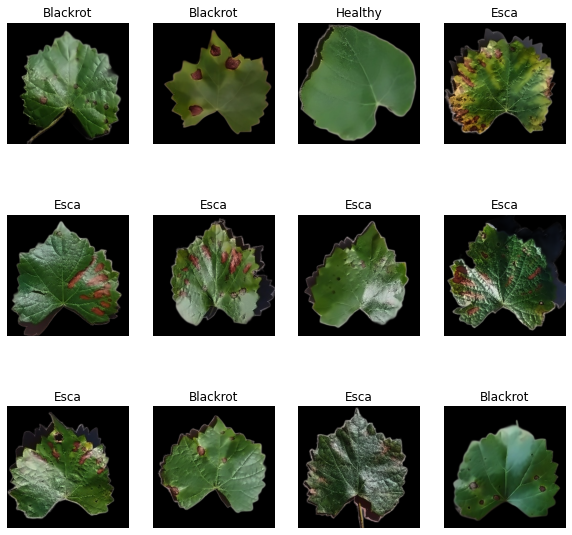

In [28]:
"""
    Recuperar la data, permitiendo tomar una muestra de información
"""
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

# Separación de los datos

### 80% ==> training
### 20% ==> 10% validation, 10% test

In [33]:
#Obtener los datos en el epoch
train_size = 0.8
len(dataset)*train_size


101.60000000000001

In [40]:
train_ds = dataset.take(102)
len(train_ds)

102

In [41]:
test_ds = dataset.skip(102)
len(test_ds)

25

In [42]:
val_size=0.1
len(dataset)*val_size

12.700000000000001

In [43]:
val_ds = test_ds.skip(13)
len(val_ds)

12

In [45]:
test_ds = test_ds.skip(12)
len(test_ds)

7

In [46]:
"""
    Definir la función mediante la cual se realizara la separación de la información correspondiente
"""
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle: 
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split* ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)
    
    return train_ds, val_ds, test_ds

In [47]:
"""
    Llamar a la función para implementar la separación de variables
"""
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [49]:
"""
    Guardar en memoria el dataset para de esta forma lograr recuperarlo
"""
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [51]:
"""
    Especificar un tamaño correspondiente a las imagenes y a su vez rescalar en valores los datos RGB
"""
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

# Declaración del modelo

In [55]:
"""
    Declarar el modelo de la Convolutional Neuron Network especificando la activación y su densidad.
"""
input_shape = (batch_size, image_size, image_size, channels)
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(image_size,image_size)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
    
])
model.build(input_shape=input_shape)

In [56]:
"""
    Obtener un resumen correspondiente del modelo declarado previamente
"""
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (32, 30, 30, 64)         

# Compilar el modelo

In [57]:
"""
    Especificar el optimizador del modelo y declarar la metrica requerida como es Accuracy
"""
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [59]:
"""
    Declarar la variable History para realizar la recuperación de la información una vez el modelo ha realizado
    el entrenamiento
"""
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)

Epoch 1/5
101/101 [==============================] - 94s 871ms/step - loss: 0.9415 - accuracy: 0.5644 - val_loss: 0.5402 - val_accuracy: 0.8021
Epoch 2/5
101/101 [==============================] - 87s 860ms/step - loss: 0.4102 - accuracy: 0.8449 - val_loss: 0.4561 - val_accuracy: 0.8333
Epoch 3/5
101/101 [==============================] - 76s 748ms/step - loss: 0.2636 - accuracy: 0.9015 - val_loss: 0.2446 - val_accuracy: 0.8958
Epoch 4/5
101/101 [==============================] - 72s 715ms/step - loss: 0.1619 - accuracy: 0.9365 - val_loss: 0.1114 - val_accuracy: 0.9609
Epoch 5/5
101/101 [==============================] - 77s 760ms/step - loss: 0.1447 - accuracy: 0.9433 - val_loss: 0.0692 - val_accuracy: 0.9740


In [107]:
"""
    Evaluar el modelo correspondiente para recuperar el accuracy obtenido tras su evaluación
"""
_, acc = model.evaluate(test_ds)

12/12 [==============================] - 3s 245ms/step - loss: 0.0689 - accuracy: 0.9688


In [110]:
"""
    Imprimir el accuracy obtenido transformando al 100% su valor numerico
"""
print('Accuracy:  %.2f' % (acc * 100.0))

Accuracy:  96.88


In [104]:
"""
    Variables declaradas mediante la función History recuperar las metricas al generarse el entrenamiento del modelo
"""
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

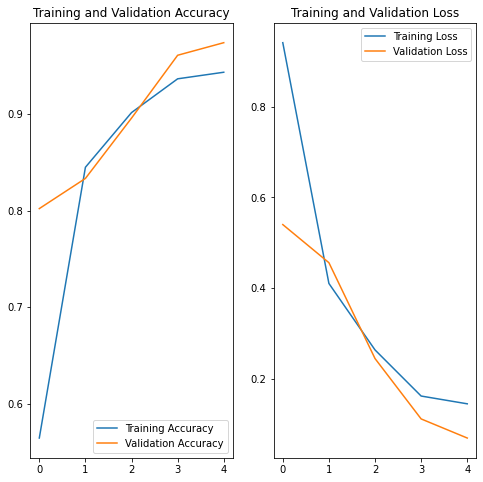

In [66]:
"""
    Realizar un mapeo de la información durante el entrenamiento y validación de la información correspondiente
"""
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Validación en las predicciones

first image to predict
actual label: Blackrot
predicted label: Blackrot


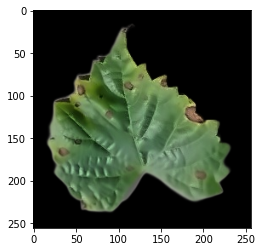

In [91]:
"""
    Emplear lo que corresponde el llamado a un ejemplo donde se especifica la etiqueta actual, demostrando
    la etiqueta mediante la cual el modelo la predice. 
"""
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[8].numpy().astype('uint8')
    first_label = labels_batch[8].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [92]:
"""
    Declara la función para predecir las clases entrantes y las clases salientes con el porcentaje de efectividad o acertado
"""

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

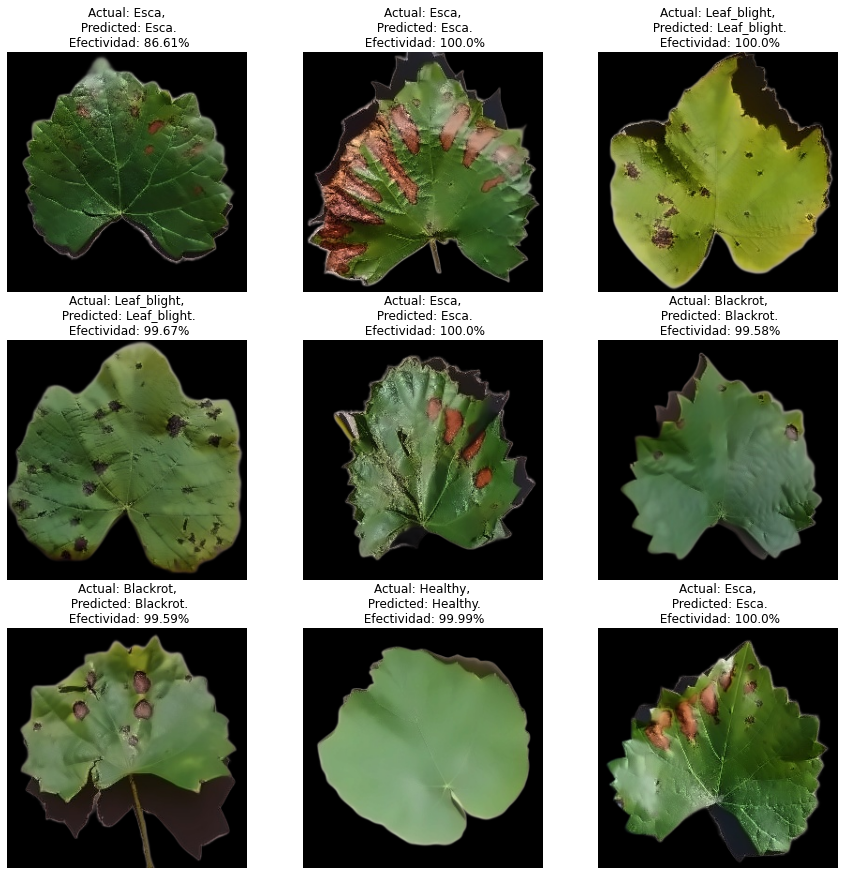

In [98]:
"""
    Implementar un ejemplo de 9 imagenes para la validación del funcionamiento del modelo denotando la clase entrante,
    la predicción del modelo y por ultimo el porcentaje de efectividad
"""
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Efectividad: {confidence}%")
        
        plt.axis("off")